In [1]:
!git clone https://github.com/facebookresearch/segment-anything-2.git

Cloning into 'segment-anything-2'...
remote: Enumerating objects: 1070, done.
remote: Total 1070 (delta 0), reused 0 (delta 0), pack-reused 1070 (from 1)
Receiving objects: 100% (1070/1070), 128.11 MiB | 31.52 MiB/s, done.
Resolving deltas: 100% (381/381), done.


In [2]:
%cd segment-anything-2
!pip install -e .

/content/segment-anything-2
Obtaining file:///content/segment-anything-2
  Installing build dependencies ... done
  Checking if build backend supports build_editable ... done
  Getting requirements to build editable ... done
  Preparing editable metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.2/42.2 kB 3.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.5/154.5 kB 11.4 MB/s eta 0:00:00
  Building editable for SAM-2 (pyproject.toml) ... done
  Created wheel for SAM-2: filename=sam_2-1.0-0.editable-cp312-cp312-linux_x86_64.whl size=13864 sha256=bc0a54f35af9470c05d7ed61c7a965f8c07c6e37e50a673d34b269fbe5b9365c
  Stored in directory: /tmp/pip-ephem-wheel-cache-xle_7_4a/wheels/25/16/48/fa81b09c6f921b052cf2192c7fe593106bf3b30cd55b918197
  Created wheel for iopath: filename=iopath-0.1.10-py3-none-any.whl size=31527 sha256=f3a0bb23c1426f01ef5503111728aa7f4c4f42cc5ff0b0ed6426b3e7ed562f0e
  Stored in dir

In [3]:
import sam2, os
print(os.path.dirname(sam2.__file__))

/content/segment-anything-2/sam2


In [4]:
!ls sam2/configs/sam2.1

sam2.1_hiera_b+.yaml  sam2.1_hiera_s.yaml
sam2.1_hiera_l.yaml   sam2.1_hiera_t.yaml


In [5]:
!pwd

/content/segment-anything-2


In [6]:
%cd checkpoints
!./download_ckpts.sh
%cd /content/segment-anything-2

/content/segment-anything-2/checkpoints
--2026-02-06 20:26:52--  https://dl.fbaipublicfiles.com/segment_anything_2/092824/sam2.1_hiera_tiny.pt
Resolving dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)... 3.163.189.14, 3.163.189.96, 3.163.189.51, ...
Connecting to dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)|3.163.189.14|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 156008466 (149M) [application/vnd.snesdev-page-table]
Saving to: ‘sam2.1_hiera_tiny.pt’

sam2.1_hiera_tiny.p 100%[===================>] 148.78M   282MB/s    in 0.5s    

2026-02-06 20:26:53 (282 MB/s) - ‘sam2.1_hiera_tiny.pt’ saved [156008466/156008466]

--2026-02-06 20:26:53--  https://dl.fbaipublicfiles.com/segment_anything_2/092824/sam2.1_hiera_small.pt
Resolving dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)... 3.163.189.14, 3.163.189.96, 3.163.189.51, ...
Connecting to dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)|3.163.189.14|:443... connected.
HTTP request sent, awaiting response... 2

In [7]:
import torch
import torchvision

print("PyTorch version:", torch.__version__)
print("Torchvision version:", torchvision.__version__)
print("CUDA is available:", torch.cuda.is_available())

PyTorch version: 2.9.0+cu126
Torchvision version: 0.24.0+cu126
CUDA is available: True


In [8]:
#!pip install -q supervision jupyter_bbox_widget

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 217.4/217.4 kB 9.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 56.1 MB/s eta 0:00:00


In [9]:
!gdown -O "/content/121364_0.mp4" "https://drive.google.com/uc?id=1vVwjW1dE1drIdd4ZSILfbCGPD4weoNiu"

Downloading...
From: https://drive.google.com/uc?id=1vVwjW1dE1drIdd4ZSILfbCGPD4weoNiu
To: /content/121364_0.mp4
100% 17.2M/17.2M [00:00<00:00, 50.8MB/s]


In [10]:
!ffmpeg -y -i "/content/121364_0.mp4" -t 5 -c:v libx264 -preset fast -crf 23 -c:a aac -b:a 128k "/content/out_5s.mp4"


ffmpeg version 4.4.2-0ubuntu0.22.04.1 Copyright (c) 2000-2021 the FFmpeg developers
  built with gcc 11 (Ubuntu 11.2.0-19ubuntu1)
  configuration: --prefix=/usr --extra-version=0ubuntu0.22.04.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --arch=amd64 --enable-gpl --disable-stripping --enable-gnutls --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libcodec2 --enable-libdav1d --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libjack --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librabbitmq --enable-librubberband --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libsrt --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvidstab --enable-libvorbis --enable-libvpx --enab

In [ ]:
%cd /content

In [78]:
!mkdir -P videos
!wget -P videos https://dl.fbaipublicfiles.com/segment_anything_2/assets/bedroom.zip
!unzip -d videos videos/bedroom.zip
%cd /content/segment-anything-2

[Errno 2] No such file or directory: 'HOME'
/content/segment-anything-2
mkdir: invalid option -- 'i'
Try 'mkdir --help' for more information.
--2026-02-06 21:41:40--  https://dl.fbaipublicfiles.com/segment_anything_2/assets/bedroom.zip
Resolving dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)... 3.163.189.96, 3.163.189.14, 3.163.189.108, ...
Connecting to dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)|3.163.189.96|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 12688166 (12M) [application/zip]
Saving to: ‘videos/bedroom.zip’

bedroom.zip         100%[===================>]  12.10M  29.9MB/s    in 0.4s    

2026-02-06 21:41:40 (29.9 MB/s) - ‘videos/bedroom.zip’ saved [12688166/12688166]

Archive:  videos/bedroom.zip
   creating: videos/bedroom/
  inflating: videos/bedroom/00005.jpg  
  inflating: videos/bedroom/00121.jpg  
  inflating: videos/bedroom/00079.jpg  
  inflating: videos/bedroom/00126.jpg  
  inflating: videos/bedroom/00002.jpg  
  inflating: videos/

In [11]:
import cv2
import torch

import numpy as np
import supervision as sv

from pathlib import Path
from PIL import Image
from typing import Optional
from IPython.display import Video

from sam2.build_sam import build_sam2_video_predictor

In [14]:
%cd /content
HOME = Path.cwd()
print("HOME:", HOME)

/content
HOME: /content


In [15]:
%cd segment-anything-2

/content/segment-anything-2


In [24]:
DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [17]:
help(build_sam2_video_predictor)

Help on function build_sam2_video_predictor in module sam2.build_sam:

build_sam2_video_predictor(config_file, ckpt_path=None, device='cuda', mode='eval', hydra_overrides_extra=[], apply_postprocessing=True, vos_optimized=False, **kwargs)



In [18]:
from hydra import initialize_config_dir
from hydra.core.global_hydra import GlobalHydra

# reset Hydra if it was already used (important in notebooks)
if GlobalHydra.instance().is_initialized():
    GlobalHydra.instance().clear()

initialize_config_dir(
    config_dir="/content/segment-anything-2/sam2/configs",
    job_name="sam2"
)

The version_base parameter is not specified.
Please specify a compatability version level, or None.
Will assume defaults for version 1.1


hydra.initialize_config_dir()

In [26]:
checkpoint = "/content/segment-anything-2/checkpoints/sam2.1_hiera_large.pt"
model_cfg = "sam2.1/sam2.1_hiera_l.yaml"

predictor = build_sam2_video_predictor(
    config_file=model_cfg,
    checkpoint=checkpoint,
    vos_optimized=True

)

Image encoder compilation is enabled. First forward pass will be slow.
Compiling all components for VOS setting. First time may be very slow.


In [27]:
VIDEO_NAME = "out_5s.mp4" # <--- CHECK THIS NAME
SOURCE_VIDEO = HOME / VIDEO_NAME
SOURCE_FRAMES = HOME / SOURCE_VIDEO.stem

SOURCE_FRAMES.mkdir(parents=True, exist_ok=True)

In [28]:
!ffmpeg -i {SOURCE_VIDEO} -q:v 2 -start_number 0 {SOURCE_FRAMES}/'%05d.jpg'

ffmpeg version 4.4.2-0ubuntu0.22.04.1 Copyright (c) 2000-2021 the FFmpeg developers
  built with gcc 11 (Ubuntu 11.2.0-19ubuntu1)
  configuration: --prefix=/usr --extra-version=0ubuntu0.22.04.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --arch=amd64 --enable-gpl --disable-stripping --enable-gnutls --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libcodec2 --enable-libdav1d --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libjack --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librabbitmq --enable-librubberband --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libsrt --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvidstab --enable-libvorbis --enable-libvpx --enab

In [29]:
import os
# if using Apple MPS, fall back to CPU for unsupported ops
os.environ["PYTORCH_ENABLE_MPS_FALLBACK"] = "1"
import numpy as np
import torch
import matplotlib.pyplot as plt
from PIL import Image

In [146]:
def show_mask(mask, ax, obj_id=None, random_color=False):
    if random_color:
        color = np.concatenate([np.random.random(3), np.array([0.6])], axis=0)
    else:
        cmap = plt.get_cmap("tab10")
        cmap_idx = 0 if obj_id is None else obj_id
        color = np.array([*cmap(cmap_idx)[:3], 0.6])
    h, w = mask.shape[-2:]
    mask_image = mask.reshape(h, w, 1) * color.reshape(1, 1, -1)
    ax.imshow(mask_image)


def show_points(coords, labels, ax, marker_size=200):
    pos_points = coords[labels==1]
    neg_points = coords[labels==0]
    ax.scatter(pos_points[:, 0], pos_points[:, 1], color='green', marker='*', s=marker_size, edgecolor='white', linewidth=1.25)
    ax.scatter(neg_points[:, 0], neg_points[:, 1], color='red', marker='*', s=marker_size, edgecolor='white', linewidth=1.25)


def show_box(box, ax):
    x0, y0 = box[0], box[1]
    w, h = box[2] - box[0], box[3] - box[1]
    ax.add_patch(plt.Rectangle((x0, y0), w, h, edgecolor='green', facecolor=(0, 0, 0, 0), lw=2))

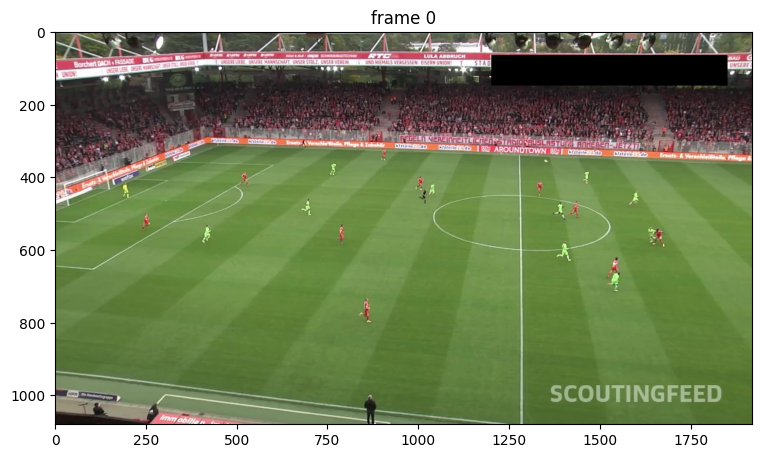

In [106]:
# `video_dir` a directory of JPEG frames with filenames like `<frame_index>.jpg`
video_dir = SOURCE_FRAMES

# scan all the JPEG frame names in this directory
frame_names = [
    p for p in os.listdir(video_dir)
    if os.path.splitext(p)[-1] in [".jpg", ".jpeg", ".JPG", ".JPEG"]
]
frame_names.sort(key=lambda p: int(os.path.splitext(p)[0]))

# take a look the first video frame
frame_idx = 0
plt.figure(figsize=(9, 6))
plt.title(f"frame {frame_idx}")
plt.imshow(Image.open(os.path.join(video_dir, frame_names[frame_idx])))


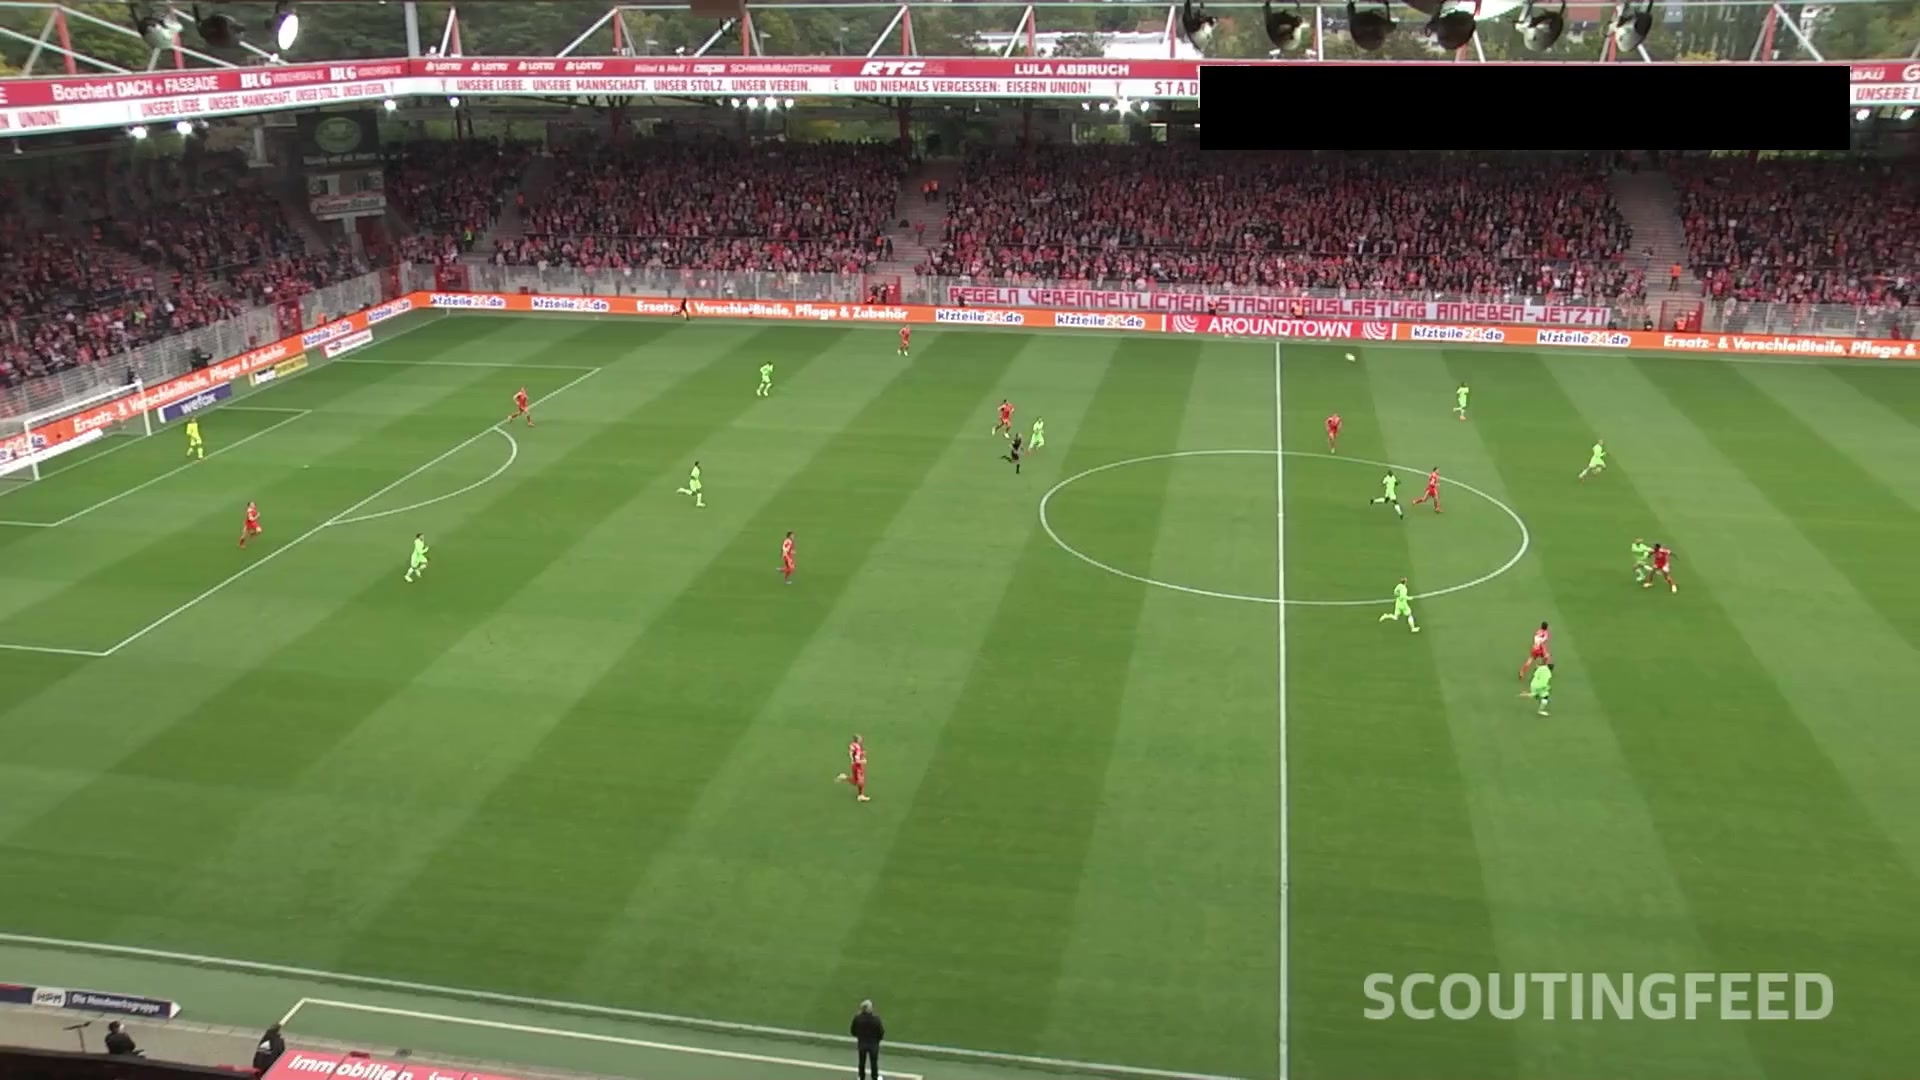

Received click: x=854, y=759, label=1


In [107]:
# Cell 1: show an image (frame) and capture clicks (x,y,label) back to Python.
# Save this as the first cell and run it. Then click the displayed image in Colab.
from google.colab import output
from IPython.display import display, HTML
import io, base64
from PIL import Image
import numpy as np
import os

# Load your frame image here (replace with how you obtain your video frame)
# e.g., frame = Image.open('frame.png')
# or if you have a numpy array `frame_np`, do Image.fromarray(frame_np)
frame = Image.open(os.path.join(video_dir, frame_names[frame_idx]))  # <-- change to your frame source

# keep a Python-side list of clicks
clicks = []  # each entry: (x, y, label) where label=1 foreground, 0 background

def on_image_click(x, y, label):
    """
    This function will be called from the browser. x,y are pixel coordinates
    relative to the image's natural size. label==1 for normal click, 0 for shift+click.
    """
    # store in global list
    clicks.append((int(x), int(y), int(label)))
    print(f"Received click: x={x}, y={y}, label={label}")
    # return something (not required)
    return "ok"

# register the callback
output.register_callback('notebook.on_image_click', on_image_click)

# prepare image bytes for inline display
buf = io.BytesIO()
frame.save(buf, format='PNG')
b64 = base64.b64encode(buf.getvalue()).decode('utf-8')

# HTML/JS: compute click coords relative to the image natural size, keep aspect ratio correct.
html = f"""
<img id="img_for_click" src="data:image/png;base64,{b64}" style="max-width:100%;height:auto;cursor:crosshair;"/>
<p style="font-size:12px;color:#666">
Click = foreground (label=1). Shift+Click = background (label=0).
</p>
<script>
const img = document.getElementById('img_for_click');
img.onclick = function(e) {{
  const rect = img.getBoundingClientRect();
  // Map client coords to the image's natural resolution coordinates:
  const x = Math.round((e.clientX - rect.left) * (img.naturalWidth / rect.width));
  const y = Math.round((e.clientY - rect.top) * (img.naturalHeight / rect.height));
  const label = e.shiftKey ? 0 : 1;  // shift+click -> background
  // send to python
  google.colab.kernel.invokeFunction('notebook.on_image_click', [x, y, label], {{}}).then((res)=>{{console.log('sent',x,y,label);}});
}};
</script>
"""
display(HTML(html))

# After clicking, you can inspect `clicks` from the next cell.


In [108]:
clicks

[(854, 759, 1)]

point_coords: [[854. 759.]]
point_labels: [1]


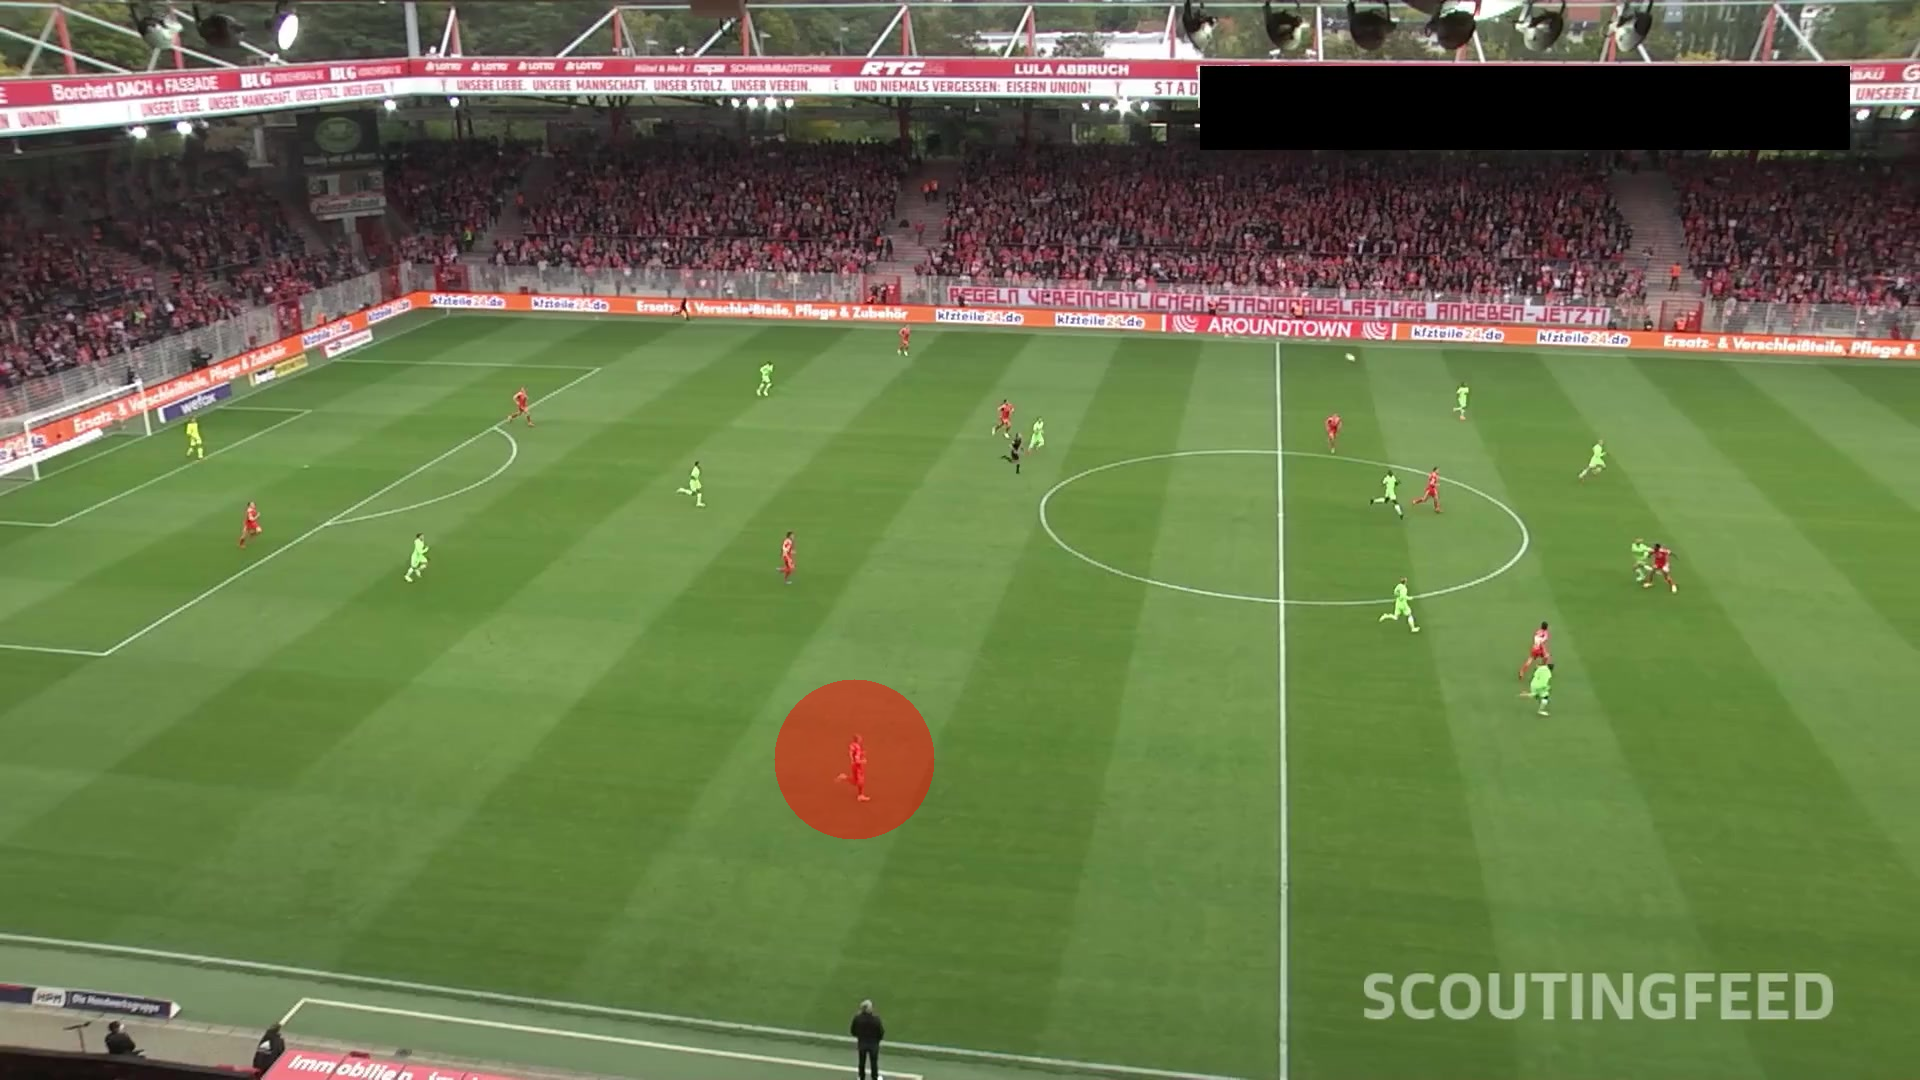

In [109]:
# Cell 2: use `clicks` to call SAM predictor and show mask overlay.
# Run this cell after you've made your clicks in Cell 1.

import numpy as np
from PIL import Image

# Example: convert clicks to numpy arrays for SAM predictor
if len(clicks) == 0:
    print("No clicks recorded. Run Cell 1 and click the image first.")
else:
    # Convert clicks to arrays: SAM expects point coords shape (N,2)
    # We'll pass coords in order [x, y] (x = column, y = row) in pixel coords.
    point_coords = np.array([[c[0], c[1]] for c in clicks], dtype=float)
    point_labels = np.array([c[2] for c in clicks], dtype=int)

    print("point_coords:", point_coords)
    print("point_labels:", point_labels)

    # -------------------------
    # Plug this into your SAM predictor.
    # Replace the following pseudo-call with your actual predictor call.
    # Example (API may vary depending on your SAM2 wrapper):
    #
    # masks, scores, logits = predictor.predict(
    #     point_coords=point_coords,
    #     point_labels=point_labels,
    #     multimask_output=False
    # )
    #
    # If your predictor requires normalized coords or reversed order, convert here.
    # -------------------------

    # --- below is a simple visualization stub to show how you'd overlay the mask ---
    # Suppose `mask` is a 2D boolean array the same HxW as the image.
    # For demonstration we'll create a fake mask centered on the first click:
    img = frame.convert("RGBA")
    W, H = img.size

    # ---- REMOVE THIS demo-mask and replace with real `mask` from SAM ----
    # Demo: circle around first click
    cx, cy = int(clicks[0][0]), int(clicks[0][1])
    demo_mask = np.zeros((H, W), dtype=bool)
    rr = 80
    yy, xx = np.ogrid[:H, :W]
    demo_mask[(yy - cy)**2 + (xx - cx)**2 <= rr*rr] = True
    mask = demo_mask
    # --------------------------------------------------------------------

    # Create RGBA overlay for mask and composite
    overlay = Image.new("RGBA", img.size, (255,0,0,0))
    overlay_data = overlay.load()
    for y in range(H):
        for x in range(W):
            if mask[y, x]:
                # semi-transparent red
                overlay_data[x,y] = (255, 0, 0, 120)
    out = Image.alpha_composite(img, overlay)
    display(out)


In [110]:
inference_state1 = predictor.init_state(video_path=str(video_dir))

frame loading (JPEG): 100%|██████████| 125/125 [00:07<00:00, 17.70it/s]


In [111]:
predictor.reset_state(inference_state1)

In [118]:
help(predictor.add_new_points_or_box)

Help on method add_new_points_or_box in module sam2.sam2_video_predictor:

add_new_points_or_box(inference_state, frame_idx, obj_id, points=None, labels=None, clear_old_points=True, normalize_coords=True, box=None) method of sam2.sam2_video_predictor.SAM2VideoPredictorVOS instance
    Add new points to a frame.



In [134]:
ann_frame_idx = 0  # the frame index we interact with
ann_obj_id = 1  # give a unique id to each object we interact with (it can be any integers)

points = np.array([[x, y] for (x, y, lbl) in clicks], dtype=np.float32)
labels = np.array([lbl for (x, y, lbl) in clicks], dtype=np.int32)
_, out_obj_ids, out_mask_logits = predictor.add_new_points_or_box(
    inference_state=inference_state1,
    frame_idx=ann_frame_idx,
    obj_id=ann_obj_id,
    points=points,
    labels=labels,
)



Skipping the post-processing step due to the error above. You can still use SAM 2 and it's OK to ignore the error above, although some post-processing functionality may be limited (which doesn't affect the results in most cases; see https://github.com/facebookresearch/sam2/blob/main/INSTALL.md).


In [113]:
points

array([[854., 759.]], dtype=float32)

In [135]:
out_mask_logits.shape

torch.Size([1, 1, 1080, 1920])

In [136]:
out_mask_logits[0].squeeze().T.shape

torch.Size([1920, 1080])

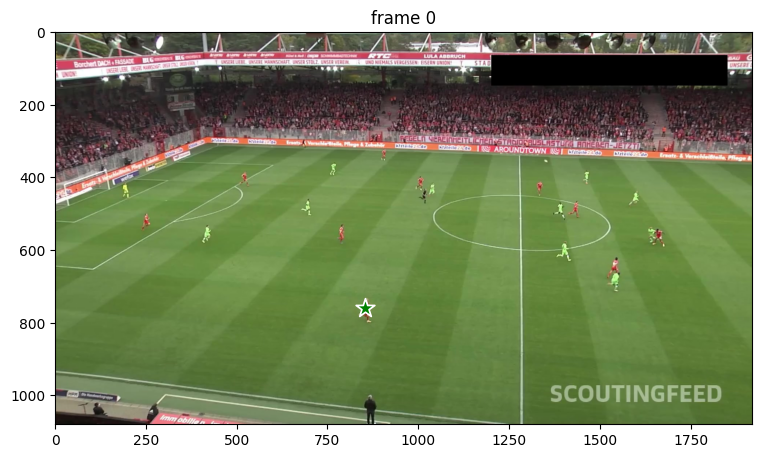

In [114]:
# show the results on the current (interacted) frame
plt.figure(figsize=(9, 6))
plt.title(f"frame {ann_frame_idx}")
plt.imshow(Image.open(os.path.join(video_dir, frame_names[ann_frame_idx])))
show_points(points, labels, plt.gca())


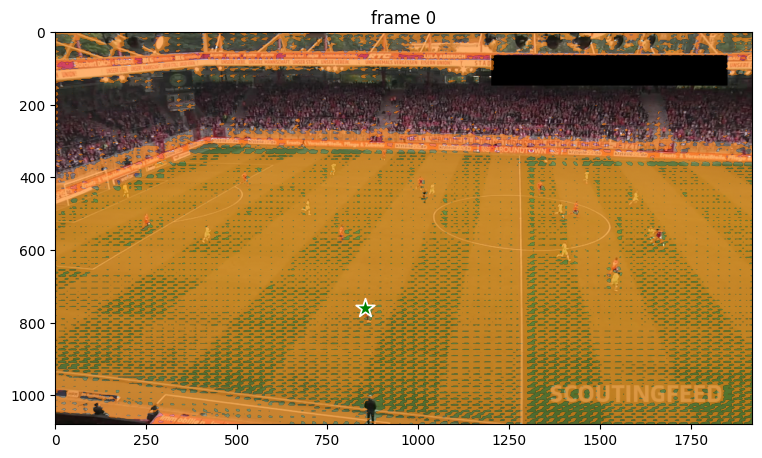

In [149]:
plt.figure(figsize=(9, 6))
plt.title(f"frame {ann_frame_idx}")
plt.imshow(Image.open(os.path.join(video_dir, frame_names[ann_frame_idx])))
show_points(points, labels, plt.gca())
mask=(out_mask_logits[0] > 0.0).cpu().numpy()
show_mask(mask, plt.gca(), obj_id=out_obj_ids[0])

In [150]:
print(mask.shape) # (Batch , Channel , H , W)
print(frame.size)  # (W, H)

(1, 1080, 1920)
(1920, 1080)


In [36]:
# run propagation throughout the video and collect the results in a dict
video_segments = {}  # video_segments contains the per-frame segmentation results
for out_frame_idx, out_obj_ids, out_mask_logits in predictor.propagate_in_video(inference_state1):
    video_segments[out_frame_idx] = {}
    for i, out_obj_id in enumerate(out_obj_ids):
        mask = (out_mask_logits[i].clone() > 0.0).cpu().numpy()
        video_segments[out_frame_idx][out_obj_id] = mask

# render the segmentation results every few frames
vis_frame_stride = 30
plt.close("all")
for out_frame_idx in range(0, len(frame_names), vis_frame_stride):
    plt.figure(figsize=(6, 4))
    plt.title(f"frame {out_frame_idx}")
    plt.imshow(Image.open(os.path.join(video_dir, frame_names[out_frame_idx])))
    for out_obj_id, out_mask in video_segments[out_frame_idx].items():
        show_mask(out_mask, plt.gca(), obj_id=out_obj_id)

Autotune Choices Stats:
{"num_choices": 2, "num_triton_choices": 0, "best_kernel": "bias_addmm", "best_time": 0.27030399441719055}
AUTOTUNE addmm(4096x256, 4096x256, 256x256)
strides: [0, 1], [256, 1], [1, 256]
dtypes: torch.float32, torch.float32, torch.float32
  bias_addmm 0.2703 ms 100.0% 
  addmm 0.2867 ms 94.3% 
SingleProcess AUTOTUNE benchmarking takes 0.0705 seconds and 0.0004 seconds precompiling for 2 choices
Autotune Choices Stats:
{"num_choices": 2, "num_triton_choices": 0, "best_kernel": "addmm", "best_time": 0.09830400347709656}
AUTOTUNE addmm(4096x64, 4096x256, 256x64)
strides: [0, 1], [256, 1], [1, 256]
dtypes: torch.float32, torch.float32, torch.float32
  addmm 0.0983 ms 100.0% 
  bias_addmm 0.1061 ms 92.7% 
SingleProcess AUTOTUNE benchmarking takes 0.0370 seconds and 0.0002 seconds precompiling for 2 choices
propagate in video:   0%|          | 0/125 [00:00<?, ?it/s]UserWarning: Torchinductor does not support code generation for complex operators. Performance may be wo

RuntimeError: Error: accessing tensor output of CUDAGraphs that has been overwritten by a subsequent run. Stack trace: File "/content/segment-anything-2/sam2/modeling/memory_attention.py", line 166, in forward
    normed_output = normed_output.transpose(0, 1). To prevent overwriting, clone the tensor outside of torch.compile() or call torch.compiler.cudagraph_mark_step_begin() before each model invocation.